# Holiday Weather Project 

What would have been the best two weeks to go on holiday to Moscow in the year 2014?

## Table of Contents

- [Introduction](#introduction)
- [Obtaining the Data](#obtaining-the-data)
- [Cleaning the Data](#cleaning-the-data)
- [Visualising the Data](#visualising-the-data)
- [Conclusion](#conclusion)

## Introduction

What would have been the best two weeks to go on holiday in Moscow in 2014? I'm going to decide what the "best" is based on what I can find in the dataset. I'll look at temperature, wind conditions, rain, etc. Whatever is available. I'll assume that warmer, less windy, less rainy conditions are the most desirable.

## Obtaining the Data

The data originally came from [wunderground.com](http://www.wunderground.com/history). This site doesn't work in the same way as described on the openlearn course but they (openlearn) have provided several datasets for 2014 to download. 

That is where I got my data from, this is the [course content page](https://www.open.edu/openlearn/digital-computing/learn-code-data-analysis/content-section-overview?active-tab=content-tab) where it can be downloaded.

### Import the data

I'll use `skipinitialspace` to remove white space after the comma seperator in the CSV file. Otherwise there will be leading whitespace in the data values.

In [1058]:
import pandas as pd
print(pd.__version__) # I like to check its working

df = pd.read_csv('./Moscow_SVO_2014.csv', skipinitialspace=True)
print(f"There are {len(df)} rows in this dataset.")

1.4.4
There are 365 rows in this dataset.


## Cleaning the Data

### Taking a look

I'll start by looking at the column names to see what data will be helpful for my purpose.

I'm most interested in temperature, wind, rain, snow and clouds. I'll simplify my dataset by selecting the most relevant columns. Also I'll change the index column to be the date.

In [1059]:
df.columns

Index(['Date', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       'Mean Humidity', 'Min Humidity', 'Max Sea Level PressurehPa',
       'Mean Sea Level PressurehPa', 'Min Sea Level PressurehPa',
       'Max VisibilityKm', 'Mean VisibilityKm', 'Min VisibilitykM',
       'Max Wind SpeedKm/h', 'Mean Wind SpeedKm/h', 'Max Gust SpeedKm/h',
       'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees<br />'],
      dtype='object')

### Change Index Column

It will be more useful to use Date as the index column. 

#### First change that column to `datetime64`.

In [1060]:
# from datetime import datetime

df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date                          datetime64[ns]
Max TemperatureC                       int64
Mean TemperatureC                      int64
Min TemperatureC                       int64
Dew PointC                             int64
MeanDew PointC                         int64
Min DewpointC                          int64
Max Humidity                           int64
Mean Humidity                          int64
Min Humidity                           int64
Max Sea Level PressurehPa              int64
Mean Sea Level PressurehPa             int64
Min Sea Level PressurehPa              int64
Max VisibilityKm                     float64
Mean VisibilityKm                    float64
Min VisibilitykM                     float64
Max Wind SpeedKm/h                     int64
Mean Wind SpeedKm/h                    int64
Max Gust SpeedKm/h                   float64
Precipitationmm                      float64
CloudCover                           float64
Events                                object
WindDirDeg

#### Then set as the index

In [1061]:
df.index = df['Date']

df.head(1)

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br />
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,1,-1,-2,-2,-3,-5,87,81,75,...,10.0,10.0,10.0,21,14,NaN,0.0,8.0,NaN,227<br />


### Simplify the dataset

I'll select the columns I'm most interested in.

In [1062]:
new_df = df[['Date', 'Max TemperatureC', 'Mean TemperatureC', 'Mean Wind SpeedKm/h', 'Precipitationmm', 'CloudCover', 'Events']]

I'll narrow the data further by choosing the warmest months.

### Warmest Months by Mean Temperature

In [1063]:
# Create a Month column
df['Month'] = df['Date'].dt.month

# Group by month and calculate the mean temperature
monthly_mean = df.groupby('Month')['Mean TemperatureC'].mean()

sorted_months = monthly_mean.sort_values(ascending=False)
sorted_months.head(3)

Month
7    19.516129
8    18.774194
6    15.166667
Name: Mean TemperatureC, dtype: float64

### Warmest Months by Max Temperature

This is the same as the previous code cell just for the Max Temperature column.

In [1064]:
monthly_mean = df.groupby('Month')['Max TemperatureC'].mean()
sorted_months = monthly_mean.sort_values(ascending=False)
top_3_months = sorted_months.head(3)
top_3_months

Month
7    26.193548
8    24.419355
6    20.600000
Name: Max TemperatureC, dtype: float64

### My simplified data

The warmest months are June, July, August. July looks the most promising. I'll explore this subset of my data in the visualisation section.

In [1065]:
warm_months = df[(df['Month'] >= 6) & (df['Month'] <= 8)]

### Null values

How many null values are there in each column? Theres quite a bit of missing data in the last two columns.

The primary data I'm interested in doesn't have any null values which makes it more useful. I'll average out the cloud cover.

NOTE: after more examination during a later secion, I think that the null values in `Events` means there was no event, ie. it did not rain, snow, thunderstorm, fog, etc. So they seem like "better" weather days. 

In [1066]:
warm_months.isna().sum()

Date                           0
Max TemperatureC               0
Mean TemperatureC              0
Min TemperatureC               0
Dew PointC                     0
MeanDew PointC                 0
Min DewpointC                  0
Max Humidity                   0
Mean Humidity                  0
Min Humidity                   0
Max Sea Level PressurehPa      0
Mean Sea Level PressurehPa     0
Min Sea Level PressurehPa      0
Max VisibilityKm              15
Mean VisibilityKm             15
Min VisibilitykM              15
Max Wind SpeedKm/h             0
Mean Wind SpeedKm/h            0
Max Gust SpeedKm/h            32
Precipitationmm                0
CloudCover                    15
Events                        42
WindDirDegrees<br />           0
Month                          0
dtype: int64

### Replace null with month average for CloudCover

In [1067]:
monthly_cloudcover_mean = warm_months.groupby('Month')['CloudCover'].mean()

# Merge the new data into the dataFrame
warm_months = pd.merge(warm_months, monthly_cloudcover_mean, how='left', on='Month', suffixes=('', '_mean'))

# Fill null values with month average
warm_months['CloudCover'] = warm_months['CloudCover'].fillna(warm_months['CloudCover_mean'])

# Use 2 decimal places
warm_months['CloudCover'] = warm_months['CloudCover'].round(2)

# Cleanup un-needed column
warm_months = warm_months.drop(['CloudCover_mean'], axis=1)

# Re-index to Date, the code above seems to change the index the the default integer indexing
warm_months = warm_months.set_index('Date')

print(f"Remaining null values in CloudCover: {warm_months['CloudCover'].isna().sum()}")


Remaining null values in CloudCover: 0


## Visualising the Data

I'll use some data viz to help me see the best weather.

### Closer look at the temperature

After looking at the plot of the warm months, I see that end of July/beginning of Aug has the best temperature. 

<AxesSubplot:xlabel='Date'>

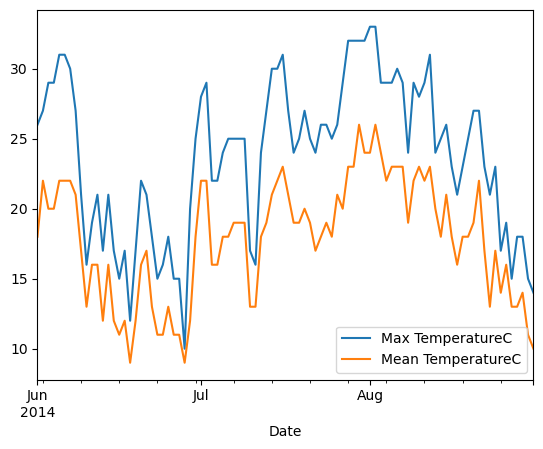

In [1068]:
warm_months[['Max TemperatureC', 'Mean TemperatureC']].plot()

### Look at the rain

There is no precipitation recorded in this dataset. I looked at the precipitation for the warm months which was 0 for all days. I though this was strange so I looked at the whole year and realised the data was missing.

I can just ignore this column, although it would have been good to avoid rainy days. Theres still the `Events` which has some data for rain, thunderstorms, though that has missing data. I'll look at it later.

<AxesSubplot:xlabel='Date'>

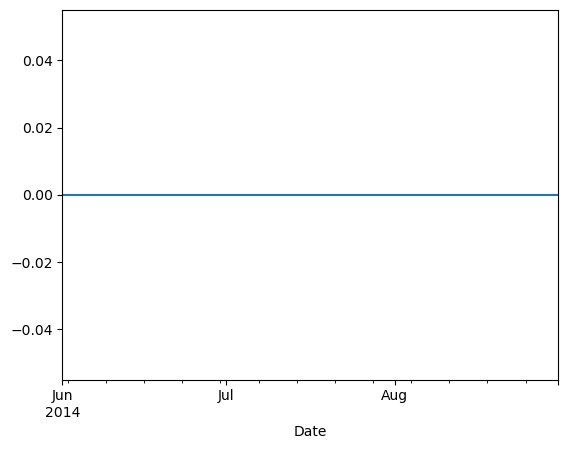

In [1069]:
warm_months['Precipitationmm'].plot()

In [1070]:
# Look at whole year
df['Precipitationmm'].describe()

count    365.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Precipitationmm, dtype: float64

### Look at the Cloud Cover

Theres some nice clear skies around the end of August. This makes sense, it lines up with the temperature.

<AxesSubplot:xlabel='Date'>

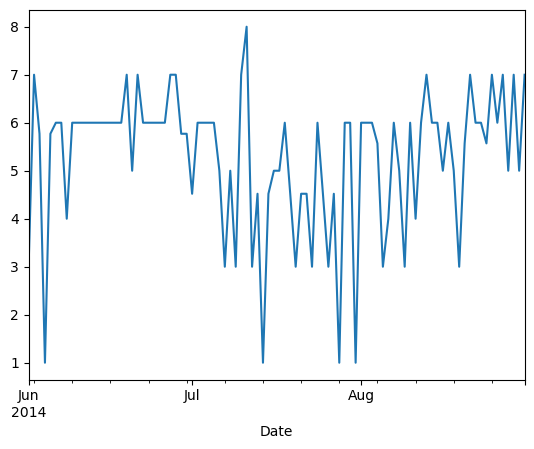

In [1071]:
warm_months['CloudCover'].plot()

### Narrow data further

I'm pretty sure the end of Jul to start of Aug will be the best weather period. I'll take a close look at that period

<AxesSubplot:xlabel='Date'>

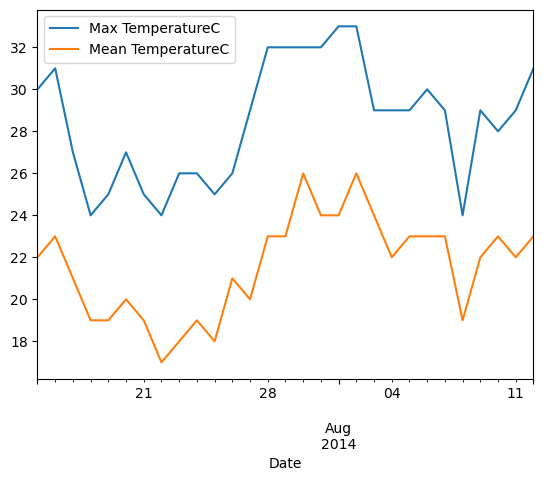

In [1072]:
start_date = pd.to_datetime('2014-07-15')
end_date = start_date + pd.Timedelta(days=28)

narrow_period = warm_months.loc[start_date:end_date]
narrow_period[['Max TemperatureC', 'Mean TemperatureC']].plot()

### Look at Events

Events are things like rain, snow, thunderstorms and fog. It would be desirable to avoid days with these events.

I'll add a boolean column for `No Events` and select just the `Max` and `Mean` Temperature so I can make a plot. I'll also keep `Events` in case I want to see the specific events that occur.

In [1073]:
no_rain = narrow_period['Events'].isna()

# Use .copy() to create a new DataFrame, this addresses a warning I was getting
new_df = narrow_period[['Max TemperatureC', 'Mean TemperatureC', 'Events']].copy()  
new_df['No Events'] = no_rain


This plot shows Events as vertical lines and dots along the Max Temp line. There aren't too many weather events around the period I'm thinking of choosing.

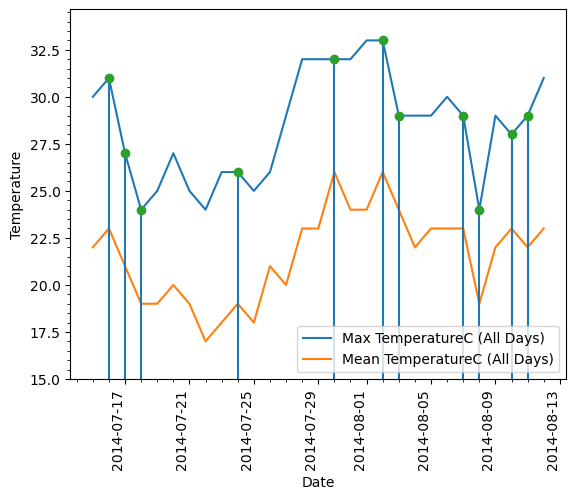

In [1074]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(new_df.index, new_df['Max TemperatureC'], label='Max TemperatureC (All Days)')
ax.plot(new_df.index, new_df['Mean TemperatureC'], label='Mean TemperatureC (All Days)')

# Create a boolean mask for days when there were events
events_mask = ~new_df['No Events']

# Overlay stem plot for days when there were events
ax.stem(new_df.index[events_mask], new_df[events_mask]['Max TemperatureC'], linefmt='-', markerfmt='o', basefmt=' ')


ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
ax.legend()

ax.set_ylim(15, None)
plt.minorticks_on()
plt.xticks(rotation=90, ha='right')
plt.show()


## Conclusion

My conclusion, based on looking at my final visualisation the dates `2014-07-24` to `2014-08-06` would have been the optimal period to visit Moscow back in 2014.

If you look at the table below you can see the temperatures are great, mostly around 30 degrees C, and there are just four weather events, three days where it rains and one where theres a thunderstorm.

In [1075]:
new_df.iloc[9:23]

,Max TemperatureC,Mean TemperatureC,Events,No Events
Date,,,,
2014-07-24,26,19,Rain,False
2014-07-25,25,18,NaN,True
2014-07-26,26,21,NaN,True
2014-07-27,29,20,NaN,True
2014-07-28,32,23,NaN,True
2014-07-29,32,23,NaN,True
2014-07-30,32,26,Rain,False
2014-07-31,32,24,NaN,True
2014-08-01,33,24,NaN,True
